### Author: *May*

# BUSINESS UNDERSTANDING

## Context and Business Problem

Retirement income adequacy remains a significant and growing concern in Kenya as life expectancy increases and traditional family-based support systems continue to weaken. Pension schemes are intended to provide financial security after retirement, yet evidence from industry reports and empirical studies suggests that a large proportion of pension scheme members retire with insufficient income to maintain a reasonable standard of living.

Industry benchmarks recommend a **replacement ratio of 60–80%** of a member’s final salary to achieve adequate retirement income. However, studies show that **only about 13% of defined contribution (DC) schemes** and **approximately 6% of defined benefit (DB) schemes** in Kenya deliver replacement ratios considered adequate for members joining at age 25. This indicates that the majority of scheme members face a high risk of income inadequacy in retirement unless they make additional voluntary savings.

At the system level, Kenya’s pension sector has experienced substantial asset growth. Pension assets exceeded **KSh 2.25 trillion by December 2024** and rose further to **over KSh 2.53 trillion by mid-2025**, largely driven by reforms such as the implementation of the **NSSF Act, 2013**. Despite this growth, the pension sector’s **asset-to-GDP ratio remains relatively low at approximately 14–15%**, compared to more mature pension systems. This suggests that asset growth has not translated into uniformly adequate retirement outcomes at the individual member level.

A critical challenge lies in the unequal retirement outcomes observed across salary scales. Evidence from the literature and data indicates that lower-income earners often achieve **higher replacement ratios** due to compulsory contribution mechanisms, while higher-income earners—despite contributing larger absolute amounts—experience **lower proportional income replacement** as contribution rates decline relative to income. Historical contribution rates of **15% (2004–2014)** and the current **18% rate** have been shown to be **inadequate**, particularly under early retirement scenarios.

These disparities are typically not visible during active employment but become evident at retirement, when corrective actions are no longer possible. For pension trustees, employers, and regulators, this creates a pressing need for data-driven tools to identify at-risk members early and to support timely policy and scheme design interventions.

## Business Objectives

- **Assess retirement income adequacy:** Measure and compare replacement ratios across salary bands.
- **Analyze contribution behavior:** Examine how employee and employer contribution rates and contribution amounts vary with income.
- **Identify at-risk groups:** Detect salary levels and member profiles associated with low projected replacement ratios.
- **Understand key drivers:** Determine which factors most strongly influence retirement income outcomes.
- **Support evidence-based decision-making:** Inform contribution rate reviews, scheme design improvements, and member education initiatives.

## Stakeholders

- **Pension Scheme Trustees:** Evaluate whether schemes deliver adequate and equitable retirement outcomes.
- **Fund Managers and Administrators:** Identify contribution gaps and members at risk of inadequate retirement income.
- **Employers:** Assess the effectiveness of existing contribution arrangements and consider enhancements.
- **Regulators (Retirement Benefits Authority):** Monitor pension adequacy and assess the impact of regulatory reforms.
- **Policymakers:** Inform national pension policy and long-term retirement income sustainability strategies.
- **Scheme Members:** Benefit indirectly from improved scheme design and clearer communication on retirement readiness.

## Success Metrics

- **Replacement ratio outcomes:** Proportion of members achieving recommended adequacy benchmarks (60–80%).
- **Contribution adequacy:** Consistency and sufficiency of contribution rates across salary scales.
- **Model performance metrics:** Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R-squared for replacement ratio predictions.
- **Feature importance:** Stability and interpretability of key drivers such as contribution rates and years of service.
- **Business relevance:** Ability to clearly identify salary groups most exposed to inadequate retirement income.

# DATA UNDERSTANDING

This study uses member-level pension data to analyze contribution behavior and retirement income adequacy across salary scales among pension scheme members in Kenya. The dataset represents anonymized administrative records drawn from multiple pension schemes and captures key demographic, employment, and contribution-related attributes relevant to retirement outcomes.

## Data Source

The dataset consists of **2,561 observations**, where each row represents an individual pension scheme member. The data includes information on members’ earnings, contribution rates, accumulated pension savings, and employment tenure. All personal identifiers have been removed to ensure confidentiality and ethical use of the data.

The data is suitable for analyzing pension adequacy because it captures the primary determinants of retirement outcomes under defined contribution (DC) pension arrangements.

## Key Variables

The dataset contains the following core variables:

- **Salary:** The member’s current or final basic salary, used as a proxy for pre-retirement earnings.
- **Age:** The current age of the member.
- **Retirement Age:** The assumed or expected retirement age for the member.
- **Years:** The total number of years to retirement.
- **Employee Contribution Rate (EE):** Percentage of salary contributed by the employee.
- **Employer Contribution Rate (ER):** Percentage of salary contributed by the employer.
- **DOB:** Date Of Birth. 
- **Contributions:** annual contributions based on the EE and ER rates.
- **Fund Value:** current accumulation from monthly contributions as at 31st December 2025. Say what one has in their savings account as at the date specified.

From these variables, additional analytical features are derived, including **projected retirement income** and **replacement ratios**, which form the core outcome measures of this study.

## Target Variable

The primary outcome of interest is the **replacement ratio**, defined as the proportion of a member’s pre-retirement salary that is expected to be replaced by pension income during retirement.

Since actual pension payouts are not observed in the data, replacement ratios are **projected** by converting accumulated fund values into estimated annual retirement income using standard annuitization assumptions. These assumptions are applied consistently across all members to enable fair comparison across salary groups.

However, the data does not capture investment performance history, annuity pricing variation, or post-retirement behavior. As a result, findings are interpreted as **projected retirement outcomes under standardized assumptions**, rather than realized pension income.

These limitations are explicitly acknowledged and addressed in the interpretation of results.

In [17]:
# ------- [Import all relevant libraries] -------

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Usual Suspects
import numpy as np           # Mathematical operations
import pandas as pd          # Data manipulation

# Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import seaborn as sns

# String manipulation
import re

# Mathematical Operations
import math

# Display settings
pd.set_option('display.max_colwidth', None)
from IPython.display import display  

#### Now to load the data and print it out.

In [18]:
# Load data
data = pd.read_csv('../Data/Research data- Raw.csv')
data

,No.,DOB,Age,Fund Value,Salary,Contributions,EE,ER,Years,Retirement age
0,1,3/25/1975,51.0,"12,621,655.25","421,820.00","84,364.00",10%,10%,9.0,60.0
1,2,2/23/1981,45.0,"8,149,961.01","465,010.00","93,002.00",10%,10%,15.0,60.0
2,3,7/24/1991,35.0,"7,085,348.52","504,660.00","100,932.00",10%,10%,25.0,60.0
3,4,4/13/1986,40.0,"6,028,192.05","504,660.00","100,932.00",10%,10%,20.0,60.0
4,5,11/14/1980,46.0,"9,458,131.00","504,660.00","100,932.00",10%,10%,14.0,60.0
...,...,...,...,...,...,...,...,...,...,...
2556,2557,1/1/1980,46.0,"140,829.12","61,215.00","6,121.50",5%,5%,-46.0,NaN
2557,2558,1/1/1980,46.0,"169,616.84","69,120.40","6,912.04",5%,5%,-46.0,NaN
2558,2559,1/1/1980,46.0,"114,402.78","52,618.00","5,261.80",5%,5%,-46.0,NaN
2559,2560,1/1/1980,46.0,"475,380.00","378,000.00","37,800.00",5%,5%,-46.0,NaN


##### *Observation:*

The data is consistent from top to bottom.

The No. column offers very little analytical values and will thus be dropped. Additionally, since there exist an age column, the DOB column is redundant. This too will be dropped.

Next, we will carry out a quick Initial Data Exploration (IDE) to get a bird’s-eye view of the dataset - just as you would form first impressions when greeting someone new.

In [19]:
# Drop No. column and DOB column
data = data.drop(columns=['No.', 'DOB'])

In [20]:
# ---- [Initial Data Exploration (IDE)] ----

# # Check dataset shape
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

# Check columns
print('\n'+'--'*40)
print("Columns:")
display(data.columns)

# Check metadata
print('\n'+'--'*40)
print("Metadata Check:\n")
display(data.info())

# Descriptive statistics
print('\n'+'--'*40)
print("Descriptive Statistics For Numeric Variables:")
display(data.describe().T)

# Categorical Variables
print('\n'+'--'*40)
print("Descriptive Statistics For Categorical Variables:")
display(data.describe(include='object').T)

# Check number of unique values in each column
print('\n'+'--'*40)
print("Unique values:")
display(data.nunique())

# Check and remove duplicates
print('\n'+'--'*40)
print("Duplicates:", data.duplicated().sum())

# Check data completeness
print('\n'+'--'*40)
missing = (
    data
    .isnull()
    .sum()
    .to_frame("Missing Values")
    .assign(Percentage=lambda x: (x["Missing Values"] / len(data)) * 100)
    .sort_values("Missing Values", ascending=False)
)

print("Missing values summary:\n")
print(missing[missing["Missing Values"] > 0])

The dataset has 2561 rows and 8 columns.

--------------------------------------------------------------------------------
Columns:


Index(['Age', ' Fund Value ', ' Salary ', ' Contributions ', 'EE', ' ER ',
       ' Years ', 'Retirement age'],
      dtype='object')


--------------------------------------------------------------------------------
Metadata Check:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              2561 non-null   float64
 1    Fund Value      2561 non-null   object 
 2    Salary          2560 non-null   object 
 3    Contributions   2560 non-null   object 
 4   EE               2561 non-null   object 
 5    ER              2561 non-null   object 
 6    Years           2561 non-null   float64
 7   Retirement age   1498 non-null   float64
dtypes: float64(3), object(5)
memory usage: 160.2+ KB


None


--------------------------------------------------------------------------------
Descriptive Statistics For Numeric Variables:


,count,mean,std,min,25%,50%,75%,max
Age,2561.0,42.317454,6.540048,24.0,37.0,45.0,46.0,59.0
Years,2561.0,-7.221788,29.215819,-50.0,-45.0,10.0,18.0,34.0
Retirement age,1498.0,60.000000,0.000000,60.0,60.0,60.0,60.0,60.0



--------------------------------------------------------------------------------
Descriptive Statistics For Categorical Variables:


,count,unique,top,freq
Fund Value,2561,2038,"777,079.24",86
Salary,2560,456,"32,054.60",172
Contributions,2560,456,"3,205.46",172
EE,2561,4,5%,1443
ER,2561,4,5%,1253



--------------------------------------------------------------------------------
Unique values:


Age                  35
 Fund Value        2038
 Salary             456
 Contributions      456
EE                    4
 ER                   4
 Years               59
Retirement age        1
dtype: int64


--------------------------------------------------------------------------------
Duplicates: 284

--------------------------------------------------------------------------------
Missing values summary:

                 Missing Values  Percentage
Retirement age             1063   41.507224
 Contributions                1    0.039047
 Salary                       1    0.039047


#### *Observation:*

- Dataset Size and Structure  
  - 2,561 rows and 10 columns.  
  - Columns include demographic, employment, and pension-related attributes.  

- Column Types and Data Quality  
  - Numeric columns: No. (int64), Age, Years, Retirement age (float64).  
  - Object columns: DOB, Fund Value, Salary, Contributions, EE, ER.  
  - Missing values:  
    - Salary and Contributions: 1 missing value each.  
    - Retirement age: 1,063 missing values.  
  - Issues:  
    - Columns like Fund Value, Salary, Contributions, EE, ER are stored as objects. They require type conversion.  
    - Years contains negative values (down to -50), which may indicate data entry errors or special encoding??  

- Descriptive Statistics:
  - Numeric Columns: 
    - Age: 24–59 years, mean 42.3.  
    - Years: mean -7.22, std 29.21, minimum -50, maximum 34 (data anomalies present).  
    - Retirement age: consistently 60 for all non-missing entries.  

  - Categorical Columns:  
    - DOB: 1,542 unique values (multiple members share birthdates).  
    - Fund Value: 2,038 unique values, most frequent 777,079.24.  
    - Salary & Contributions: 456 unique values each; most frequent 32,054.60 and 3,205.46 respectively.  
    - EE & ER: 4 unique values each; most frequent 5%.  

- Takeaways 
  - Dataset contains a mix of numeric and object-formatted financial data requiring **cleaning and type conversion**.  
  - Missing and negative values need attention before modeling or analysis.  
  - Uniformity in Retirement age indicates either a policy standard or limited variability.


# DATA WRANGLING

We start by standardizing the columns by lowercasing them and removing leading and trailing whitespaces then do type conversion. This is to ensure the data is consistent.

In [21]:
# Standardize column names
data.columns = (
    data.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_') 
      .str.replace(r'[^\w]', '', regex=True)
)

# Rename Years to years_to_retirement
data = data.rename(columns={'years': 'years_to_retirement'})

display(data.columns)

# ---------- [Type conversions] ----------

# Convert monetary columns
money_cols = ['fund_value', 'salary', 'contributions']

for col in money_cols:
    data[col] = (
        data[col]
        .str.replace(',', '', regex=False)
        .astype(float)
    )

# Convert percentage columns
percent_cols = ['ee', 'er']

for col in percent_cols:
    data[col] = (
        data[col]
        .str.replace('%', '', regex=False)
        .astype(float)
        / 100
    )

# Ensure numeric columns
numeric_cols = ['age', 'years_to_retirement', 'retirement_age']
data[numeric_cols] = data[numeric_cols].astype(float)

# Sanity check
print('Dataset Preview:')
display(data.head())

print("Metadata Check After Cleaning:\n")
display(data.info())

Index(['age', 'fund_value', 'salary', 'contributions', 'ee', 'er',
       'years_to_retirement', 'retirement_age'],
      dtype='object')

Dataset Preview:


,age,fund_value,salary,contributions,ee,er,years_to_retirement,retirement_age
0,51.0,12621655.25,421820.0,84364.0,0.1,0.1,9.0,60.0
1,45.0,8149961.01,465010.0,93002.0,0.1,0.1,15.0,60.0
2,35.0,7085348.52,504660.0,100932.0,0.1,0.1,25.0,60.0
3,40.0,6028192.05,504660.0,100932.0,0.1,0.1,20.0,60.0
4,46.0,9458131.00,504660.0,100932.0,0.1,0.1,14.0,60.0


Metadata Check After Cleaning:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2561 non-null   float64
 1   fund_value           2561 non-null   float64
 2   salary               2560 non-null   float64
 3   contributions        2560 non-null   float64
 4   ee                   2561 non-null   float64
 5   er                   2561 non-null   float64
 6   years_to_retirement  2561 non-null   float64
 7   retirement_age       1498 non-null   float64
dtypes: float64(8)
memory usage: 160.2 KB


None

Next, we drop duplicated records to maintain dataset uniqueness and integrity.

In [22]:
# Dealing with duplicates.
# Exact duplicate observations were identified and removed to avoid over-representation.
data = data.drop_duplicates().reset_index(drop=True)

# Sanity check after removing duplicates
print("Duplicates after cleaning:", data.duplicated().sum())

Duplicates after cleaning: 0


And lastly, we drop nulls in salary and contributions columns and fill nulls in retirement_age with the median.

In [23]:
# Dealing with nulls
# Drop observations with missing salary or contributions
data = data.dropna(subset=["salary", "contributions"]).reset_index(drop=True)

# Fill missing values in retirement_age with median
median_retirement_age = data["retirement_age"].median()
data["retirement_age"] = data["retirement_age"].fillna(median_retirement_age)

# Sanity check after handling nulls
print("Missing values after cleaning:")
display(data[["salary", "contributions", "retirement_age"]].isnull().sum())

Missing values after cleaning:


salary            0
contributions     0
retirement_age    0
dtype: int64

There existed negative years to retirement. These resulted from nulls in retirement_age. Years to retirement is calculated by getting the difference between retirement_age and age. Thus we recalculate this and replace the negative values with the actual number of years to returement.

In [24]:
# Recalculate years_to_retirement
data['years_to_retirement'] = data['retirement_age'] - data['age']

# Optional: check for any remaining negative values
negative_years = data[data['years_to_retirement'] < 0]
print(f"Number of negative years_to_retirement after recalculation: {len(negative_years)}")

Number of negative years_to_retirement after recalculation: 0


With the data cleaned, we proceed to Exploratory Data Analysis (EDA) in three stages:

- Univariate analysis: explore individual variables.
- Bivariate analysis: examine relationships between pairs of variables.
- Multivariate analysis: analyze interactions among three or more variables.

## FEATURE ENGINEERING

In [25]:
# 1. Replacement Ratio (Proxy)
data["rr"] = data["fund_value"] / data["salary"]

# 2. Total Contribution Rate
data["total_contribution_rate"] = data["ee"] + data["er"]

# 3. Contribution-to-Salary Ratio
data["contribution_to_salary_ratio"] = (
    data["contributions"] / data["salary"]
)

# 4. Fund Accumulation Efficiency
data["fund_per_year_to_retirement"] = (
    data["fund_value"] / data["years_to_retirement"]
)

# Numerical safety
data.replace([np.inf, -np.inf], np.nan, inplace=True)

data.head()

,age,fund_value,salary,contributions,ee,er,years_to_retirement,retirement_age,rr,total_contribution_rate,contribution_to_salary_ratio,fund_per_year_to_retirement
0,51.0,12621655.25,421820.0,84364.0,0.1,0.1,9.0,60.0,29.921899,0.2,0.2,1.402406e+06
1,45.0,8149961.01,465010.0,93002.0,0.1,0.1,15.0,60.0,17.526421,0.2,0.2,5.433307e+05
2,35.0,7085348.52,504660.0,100932.0,0.1,0.1,25.0,60.0,14.039846,0.2,0.2,2.834139e+05
3,40.0,6028192.05,504660.0,100932.0,0.1,0.1,20.0,60.0,11.945056,0.2,0.2,3.014096e+05
4,46.0,9458131.00,504660.0,100932.0,0.1,0.1,14.0,60.0,18.741590,0.2,0.2,6.755808e+05


# EXPLORATORY DATA ANALYSIS (EDA)

## 1. UNIVARIATE ANALYSIS

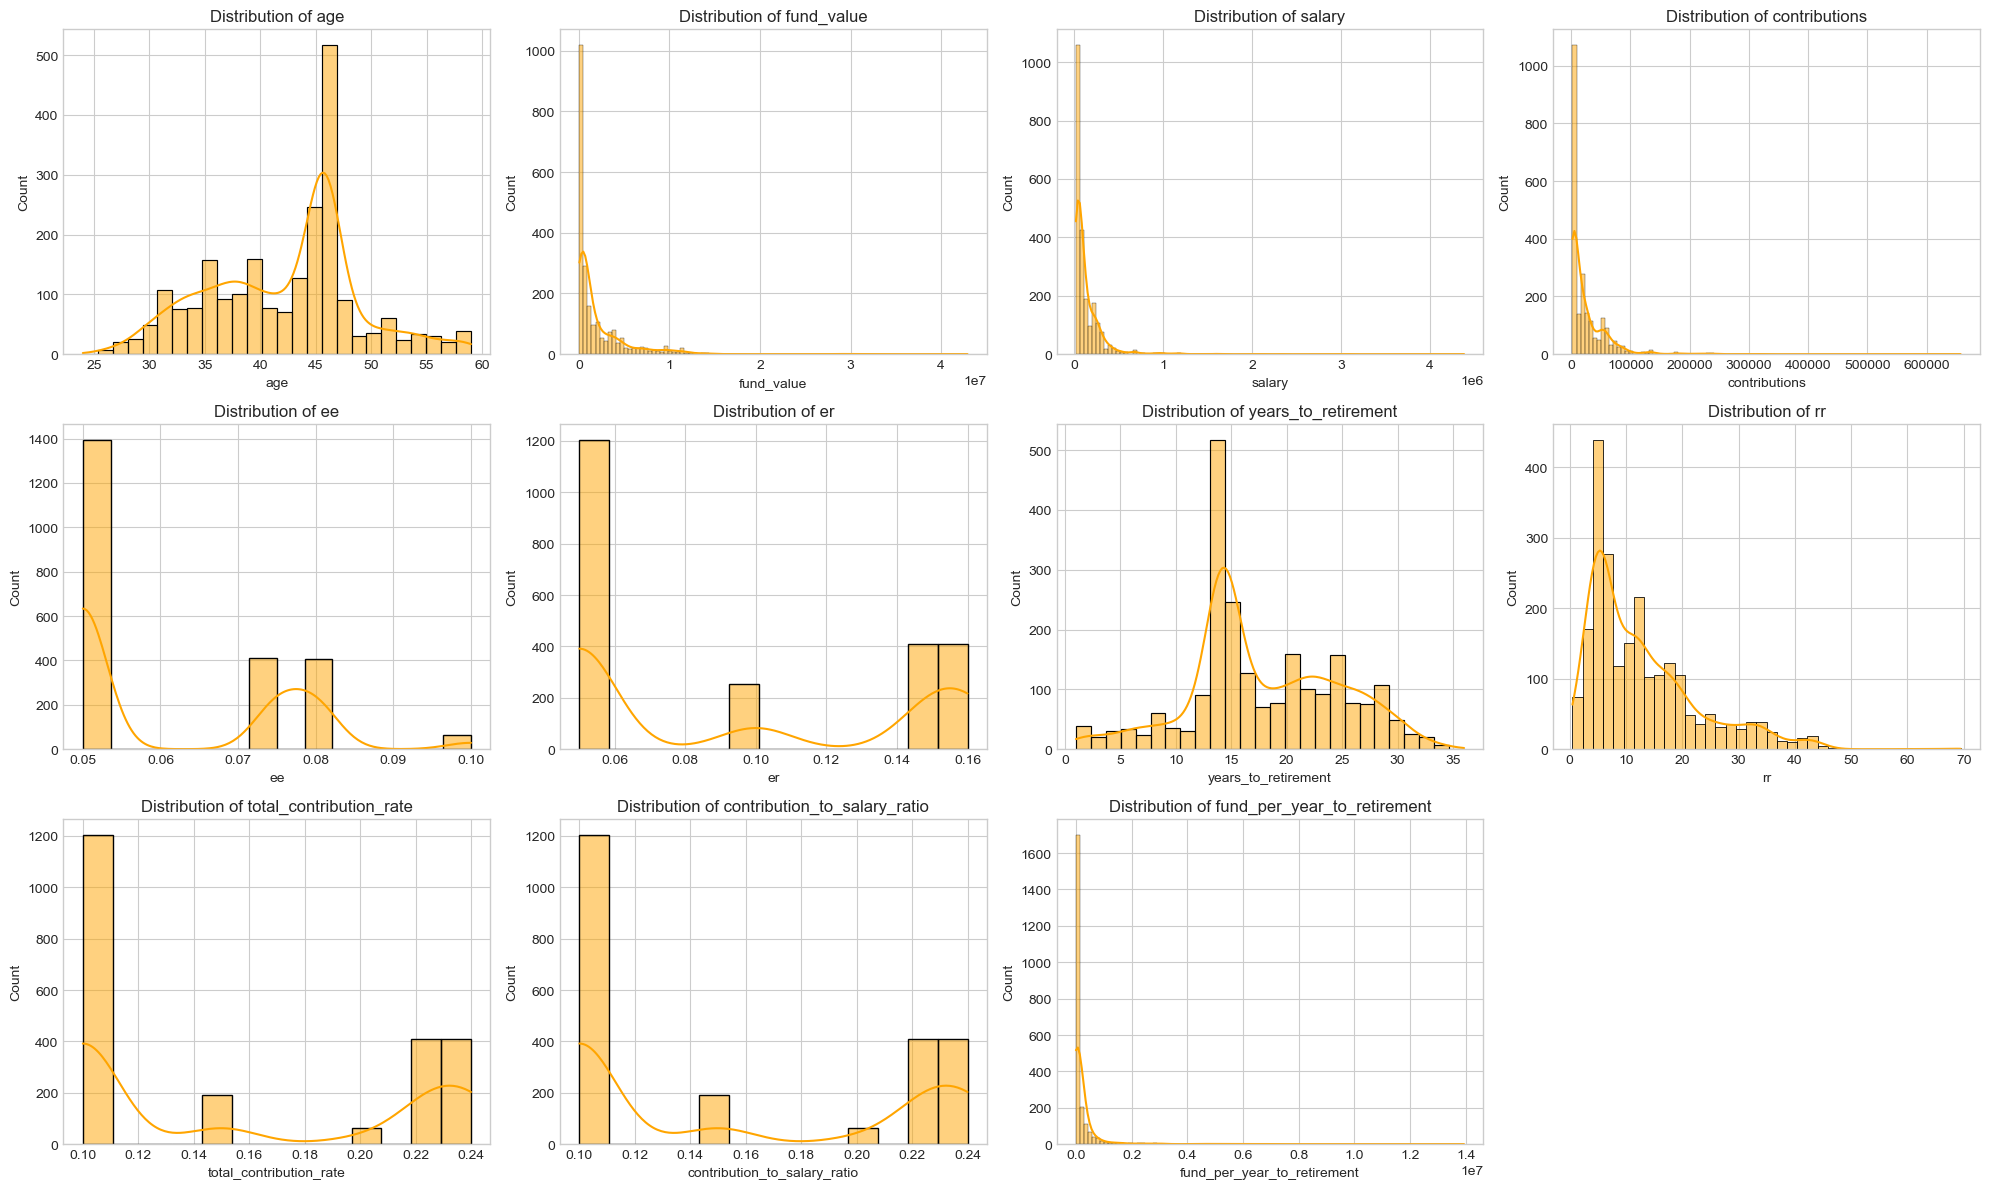

In [26]:
# Columns to plot (exclude 'retirement_age')
numeric_cols = [col for col in data.columns if col != "retirement_age"]

# Determine grid size
n_cols = 4
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

# Plot distributions
for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], kde=True, ax=axes[i], color='orange')  
    axes[i].set_title(f'Distribution of {col}')

# Remove any unused subplots
for j in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### *Observation:*

**Age:**  
The age distribution is approximately unimodal with mild right skewness, with most members concentrated between **35 and 48 years**. A noticeable clustering in the late 40s suggests that a substantial proportion of members are approaching retirement, making the assessment of retirement adequacy and replacement ratios particularly relevant for this cohort.

**Fund Value:**  
Fund values exhibit a **highly right-skewed distribution**, characterized by a large mass of members holding relatively low accumulated balances and a small number of members with exceptionally high fund values. This indicates significant **concentration of pension wealth**, where a minority of members account for a disproportionately large share of total assets.

**Salary:**  
Salary distribution is also **strongly right-skewed**, with most members clustered in lower salary ranges and a small number of high-income outliers. This pattern is consistent with hierarchical wage structures and highlights pronounced income inequality within the pension membership.

**Contributions:**  
The distribution of annual contributions closely mirrors that of salaries, reflecting the salary-based nature of contribution calculations. The presence of large contribution outliers corresponds primarily to high-income earners contributing larger absolute amounts rather than widespread voluntary over-contribution.

**Employee Contribution Rate (EE):**  
The employee contribution rate displays a **multi-modal and discrete distribution**, indicating that contribution rates are clustered around specific policy-defined levels rather than being continuously distributed. This suggests limited individual discretion in setting contribution rates.

**Employer Contribution Rate (ER):**  
Employer contribution rates are even more clearly **discrete**, reinforcing the view that employer contributions are largely determined by scheme or organizational policy rather than member-specific characteristics. As such, this variable reflects structural design features of pension schemes.

**Years to Retirement:**  
The years-to-retirement variable exhibits a **bimodal distribution**. One cluster contains negative values, indicating members who have surpassed the assumed retirement age but remain active, while another cluster is concentrated between approximately **10 and 25 years to retirement**, representing mid-career members.

This heterogeneity in retirement timing has important implications for accumulated fund adequacy, timing of benefit withdrawals, and the interpretation of replacement ratios across different age cohorts.

## 2. BIVARIATE ANALYSIS

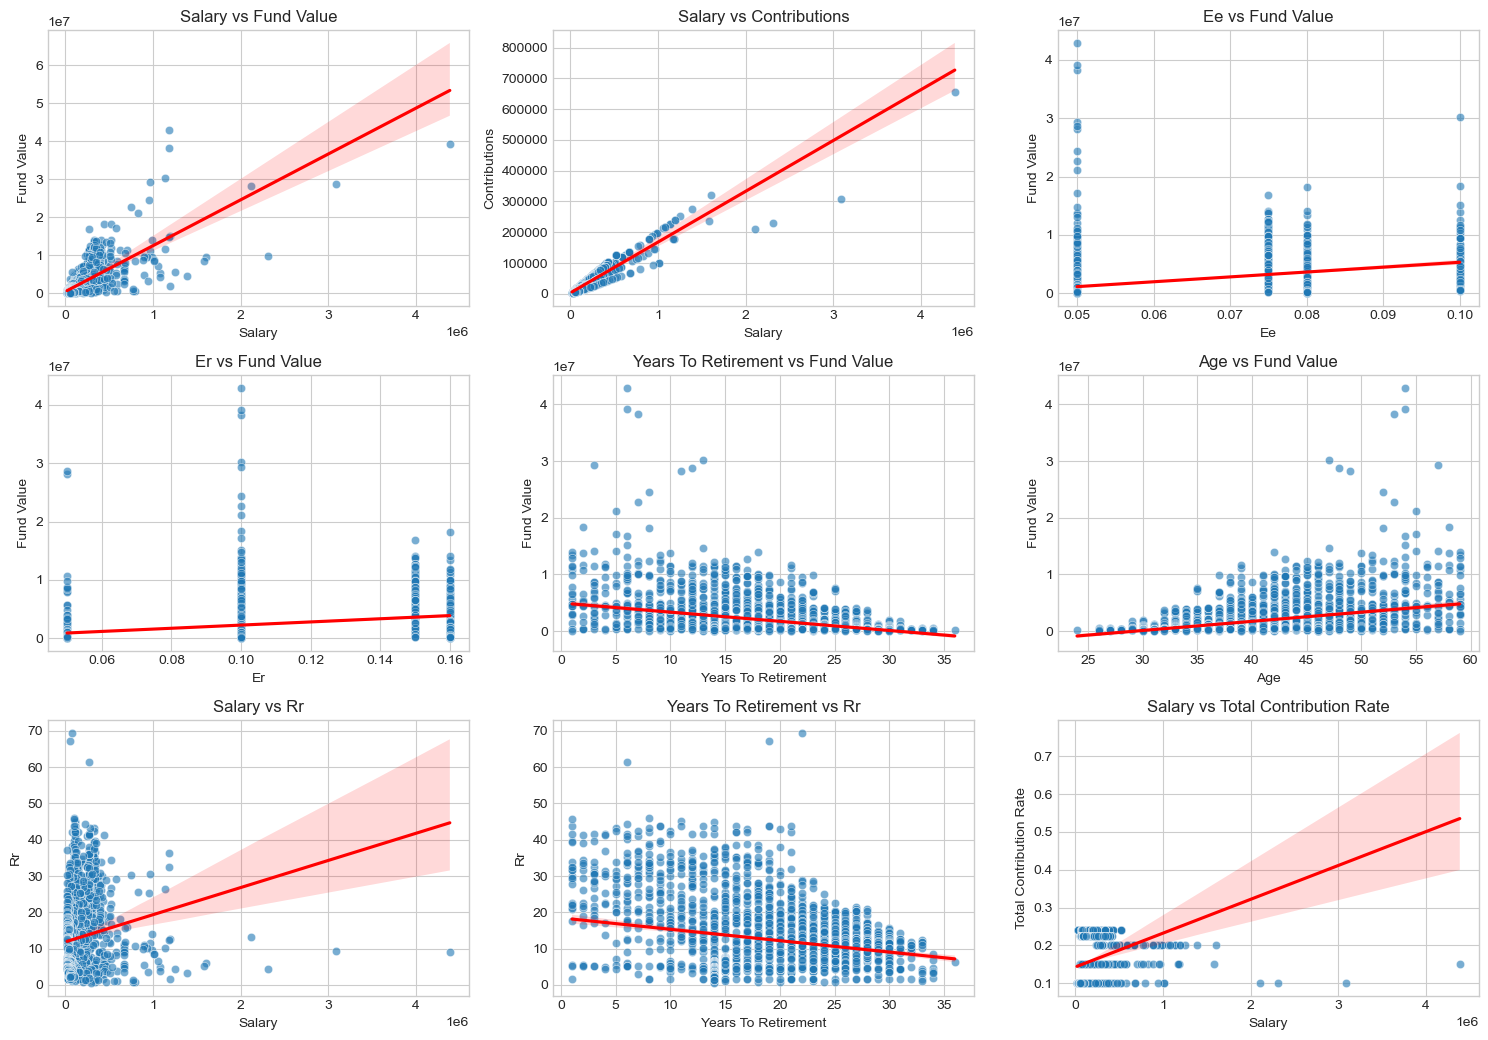

In [27]:
# Bivariate pairs to plot (excluding retirement_age)
bivariate_pairs = [
    ('salary', 'fund_value'),
    ('salary', 'contributions'),
    ('ee', 'fund_value'),
    ('er', 'fund_value'),
    ('years_to_retirement', 'fund_value'),
    ('age', 'fund_value'),
    ('salary', 'rr'),
    ('years_to_retirement', 'rr'),
    ('salary', 'total_contribution_rate')
]

# Determine grid size
n_pairs = len(bivariate_pairs)
n_cols = 3
n_rows = (n_pairs + n_cols - 1) // n_cols

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 3.5*n_rows))
axes = axes.flatten()  # Flatten in case of 2D array

# Loop through pairs and plot
for i, (x_col, y_col) in enumerate(bivariate_pairs):
    sns.scatterplot(data=data, x=x_col, y=y_col, alpha=0.6, ax=axes[i])
    sns.regplot(data=data, x=x_col, y=y_col, scatter=False, color='red', ax=axes[i])
    axes[i].set_title(f'{x_col.replace("_"," ").title()} vs {y_col.replace("_"," ").title()}')
    axes[i].set_xlabel(x_col.replace("_"," ").title())
    axes[i].set_ylabel(y_col.replace("_"," ").title())

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### *Observations:*

**1. Salary vs Fund Value**
- Fund value increases with salary, reflecting the salary-linked nature of contributions.
- Significant dispersion at higher salary levels indicates that salary alone does not determine fund accumulation.
- Variations are largely driven by years to retirement, contribution rates, and the timing of entry into the pension scheme.

**2. Salary vs Contributions**
- A near-perfect linear relationship is observed.
- This confirms that contributions are mechanically derived from salary using EE and ER rates.
- Salary and contributions are therefore highly collinear and should not be used together unadjusted in modeling.

**3. Employee Contribution Rate (EE) vs Fund Value**
- EE values are discrete, reflecting policy-defined contribution bands.
- Only a weak positive relationship exists between EE and fund value.
- This suggests that increasing EE alone has limited impact without sufficient salary and time.

**4. Employer Contribution Rate (ER) vs Fund Value**
- ER shows a slightly stronger association with fund value than EE.
- Employer contributions provide a stabilizing effect, particularly for lower-salary members.
- Nonetheless, ER remains a secondary driver when considered in isolation.

**5. Years to Retirement vs Fund Value**
- A clear inverse relationship is observed.
- Members closer to retirement tend to have higher accumulated fund values.
- This aligns with lifecycle accumulation theory and highlights years to retirement as a key structural variable.

**6. Age vs Fund Value**
- Fund value generally increases with age, reflecting longer contribution histories.
- Dispersion widens at older ages, indicating heterogeneity in career paths, salary growth, and scheme entry timing.
- Age overlaps conceptually with years to retirement and should be handled carefully in modeling.

**7. Salary vs Replacement Ratio (RR = Fund Value / Salary)**
- The relationship is weak and nonlinear.
- Lower-salary members often exhibit higher replacement ratios.
- This suggests the presence of contribution caps, minimum contribution floors, or benefit structures favoring lower earners.
- Replacement adequacy is therefore not directly proportional to salary.

**8. Years to Retirement vs Replacement Ratio**
- A strong negative relationship exists.
- Members closer to retirement display higher replacement ratios.
- This validates RR as a time-dependent proxy for retirement adequacy.

**9. Salary vs Total Contribution Rate (EE + ER)**
- Total contribution rate shows little sensitivity to salary.
- Most members cluster within a narrow contribution band.
- This confirms contribution rates are policy-driven rather than income-driven.

**10. Contribution-to-Salary Ratio**
- Closely mirrors the total contribution rate, confirming internal data consistency.
- Limited variability reduces its standalone explanatory power unless interacted with salary or time variables.

**11. Fund Accumulation Efficiency**  
*(Fund Value ÷ Years to Retirement)*
- Higher efficiency values are concentrated among older members, high-salary earners, and those with stronger employer support.
- This metric captures accumulation intensity rather than absolute size.
- It is useful for identifying under-accumulating members at similar lifecycle stages.

Overall:
- Time-related variables (age and years to retirement) are the dominant drivers of fund accumulation and adequacy.
- Salary determines scale but not efficiency.
- Contribution rates matter primarily through interaction effects.
- Structural constraints in the data justify nonlinear models and interaction terms.

## 3. MULTIVARIATE ANALYSIS

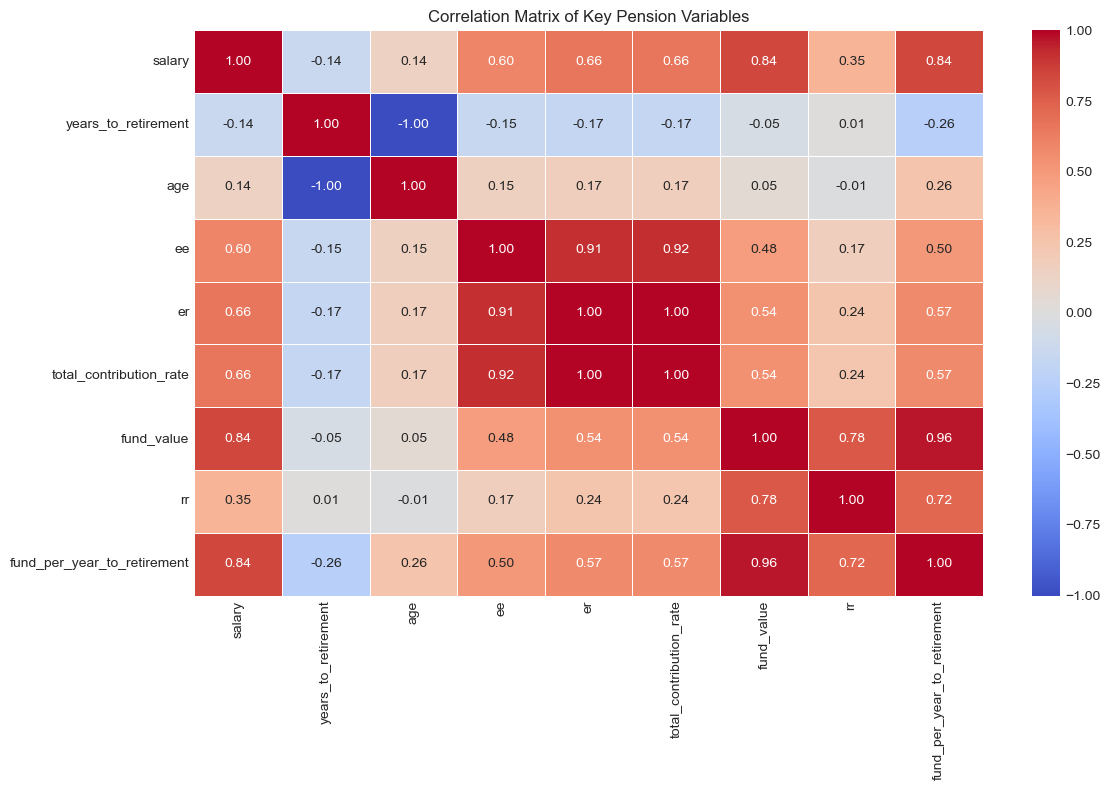

In [28]:
# Build correlation matrix
vars_corr = [
    "salary",
    "years_to_retirement",
    "age",
    "ee",
    "er",
    "total_contribution_rate",
    "fund_value",
    "rr",
    "fund_per_year_to_retirement"
]

corr = data[vars_corr].corr(method='spearman')

plt.figure(figsize=(12, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix of Key Pension Variables")

plt.tight_layout()
plt.show()

#### *Observations:*

Spearman correlations were used to account for skewness and non-normality.

The correlation analysis reveals several important relationships among the pension variables.

There is a near-perfect positive correlation between **employer contribution (er)** and **total contribution rate (0.99)**, as well as a very strong relationship between **employee contribution (ee)** and the total contribution rate (0.92). Additionally, employee and employer contributions are highly correlated (0.87). Indicating potential multicollinearity, suggesting that including all three variables in a predictive model may distort coefficient estimates. For modeling, it would be advisable to retain only the total contribution rate or drop one of the contribution variables.

**Salary** shows a strong positive correlation with **fund value (0.73)**, implying that higher-income individuals tend to accumulate larger retirement funds. Fund value is also moderately correlated with the **rate of return (0.62)** and **fund per year to retirement (0.61)**, highlighting the importance of investment performance and consistent funding in pension growth.

As expected, **age** and **years to retirement** exhibit a perfect negative correlation (-1.00), meaning they capture the same underlying information. Including both in a model would be redundant; therefore, only one should be selected.

Moderate positive relationships exist between salary and contribution variables (0.27–0.37), suggesting that higher earners generally contribute more toward retirement. Meanwhile, years to retirement is moderately negatively correlated with fund-related metrics (-0.32 to -0.41), indicating that individuals closer to retirement often have stronger annual funding levels.

## CONCLUSIONS AND RECOMMENDATIONS

### CONCLUSION

This analysis assessed retirement income adequacy across salary scales among pension scheme members in Kenya and examined the key drivers of observed retirement outcomes. The findings indicate that while pension accumulation increases with income and age, adequate and equitable retirement income is not guaranteed when evaluated using replacement ratios.

The pension membership is predominantly mid- to late-career, with a substantial proportion of members approaching retirement. This demographic structure heightens the importance of retirement adequacy assessments, as many members have limited remaining time to adjust contribution behavior. The highly right-skewed distributions of salary and fund value reveal pronounced inequality, where a small group of high-income earners holds a disproportionate share of accumulated pension wealth.

Salary is a strong determinant of the absolute size of pension fund balances but a weak and nonlinear predictor of retirement adequacy. Lower-income members often achieve higher replacement ratios, suggesting that scheme design features—such as uniform contribution rates, contribution floors, or caps—implicitly support adequacy among lower earners while constraining proportional income replacement for higher earners.

Time-related variables dominate retirement outcomes. Age and years to retirement emerge as the most influential drivers of both fund accumulation and replacement adequacy, with members closer to retirement exhibiting higher fund values and replacement ratios. The perfect inverse relationship between age and years to retirement confirms that these variables capture the same underlying lifecycle dimension.

Contribution behavior is largely structural rather than discretionary. Employee and employer contribution rates are discrete and highly collinear, reflecting policy-defined contribution bands. Contributions are mechanically linked to salary, limiting their independent explanatory power and reducing the effectiveness of contribution rate adjustments in isolation.

The fund accumulation efficiency metric highlights substantial variation in accumulation intensity among members at similar lifecycle stages, enabling the identification of under-accumulating members who may face inadequate retirement income despite comparable ages or salaries.

Overall, the findings demonstrate that retirement income adequacy in Kenyan pension schemes is shaped primarily by lifecycle position and scheme design, rather than by individual contribution choices. System-level asset growth has not translated into uniformly adequate or proportionate retirement outcomes across salary scales.

### RECOMMENDATION

- **Prioritize adequacy-based metrics:** Pension schemes should emphasize replacement ratios and accumulation efficiency measures alongside absolute fund balances in reporting and member communication.

- **Adopt lifecycle-sensitive contribution structures:** Introduce age- or tenure-based contribution escalation mechanisms to address the strong dependence of retirement adequacy on time in the system.

- **Review uniform contribution rate policies:** Consider graduated or progressive contribution rates to improve proportional retirement income replacement, particularly for higher-income members.

- **Enhance employer contribution support:** Expand employer matching or targeted employer top-ups, especially for members approaching retirement with limited remaining accumulation horizons.

- **Operationalize early-warning indicators:** Use fund accumulation efficiency metrics to identify under-accumulating members early and deploy targeted interventions while corrective action is still possible.

- **Strengthen analytical and regulatory frameworks:** Address multicollinearity by consolidating contribution variables and selecting either age or years to retirement in modeling, while incorporating nonlinear specifications and interaction effects for more accurate policy-relevant insights.

# MODELING